# 시각화의 원리(핵심요소)

## Visualization Wheel(Alberto Cairo)

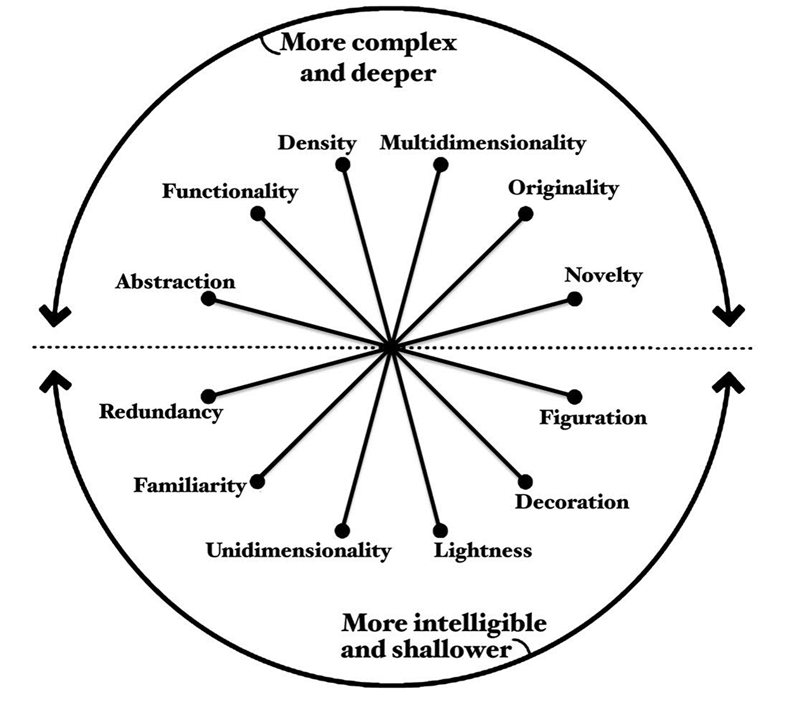

## 표현의 원칙

   - 시각화에 투입된 데이터셋의 특성만 표현
   - 최대한 의미있는 정보만 표현
   - 보는 사람이 누구이고, 보는 사람이 보고자 하는 것이 무엇인지 표현

# 시각화 절차

  - 데이터 준비 (수집)
  - 데이터 전처리 (정제 및 구조화)
  - 데이터 추출 및 마이닝
  - 데이터 시각화
  - 시각화 개선 (의미와 목적 강조)

# 시각화 오류

Misleading 방지와 발생 사례
   - 원근감을 반드시 고려하여야 한다. (가능하면 2D 출력 권장)
   - 반드시 필요한 정보 제공 (정당의 색상과 토지면적, 정당의 색상과 인구수)
   - 2개 이상의 plot에서의 기준 값
   - 컬러의 비매칭
   - 비율이나 범위가 다른 2개 데이타를 하나의 plot에 출력


# 시각화 오류 사례(Case)